In [37]:
# Bibliotecas
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [38]:
# Organização do Conjunto de Treinamento
raw_data = pd.read_csv("Bank-data.csv")
raw_data
training_data = raw_data.copy()
training_data = training_data.drop(["Unnamed: 0"], axis=1)
training_data["y"] = training_data["y"].map({"yes":1, "no":0})
training_data
training_data.describe()

y = training_data["y"]
x1 = training_data["duration"]
#x1 = training_data[["interest_rate", "credit", "march", "may", "previous", "duration"]]

# Regressão Logística Simples (Treinamento do Modelo)
x = sm.add_constant(x1)
model = sm.Logit(y,x).fit()
model.summary()
cm_training = np.array(model.pred_table())
training_accuracy = (cm_training[0,0] + cm_training[1,1]) / cm_training.sum()
print(f"Training Accuracy: {training_accuracy}")

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7
Training Accuracy: 0.693050193050193


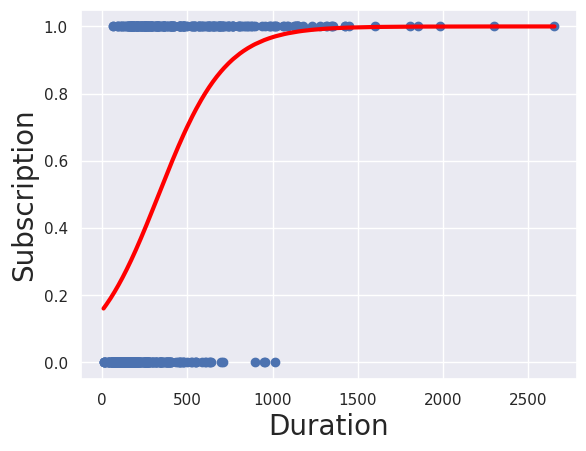

In [39]:
# Visualização dos Dados
def f(x,b0,b1):
  return np.array(np.exp(b0 + b1*x) / (1 + np.exp(b0 + b1*x)))

f_sorted = np.sort(f(x1,model.params[0],model.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color="C0")
plt.xlabel("Duration", fontsize=20)
plt.ylabel("Subscription", fontsize=20)
plt.plot(x_sorted, f_sorted, color="red", lw=3)
plt.show()

In [40]:
# Recalculando a Regressão Logística Múltipla (com mais variáveis)
x1 = training_data[["interest_rate", "credit", "march", "previous", "duration"]]
x = sm.add_constant(x1)
model = sm.Logit(y,x).fit()
model.summary()
cm_training = np.array(model.pred_table())
training_accuracy = (cm_training[0,0] + cm_training[1,1]) / cm_training.sum()
print(f"Training Accuracy: {training_accuracy}")

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7
Training Accuracy: 0.862934362934363


In [42]:
# Avaliação do Conjunto de Teste
raw_data = pd.read_csv("Bank-data-testing.csv")
test_data = raw_data.copy()
test_data = test_data.drop(["Unnamed: 0"], axis=1)
test_data["y"] = test_data["y"].map({"yes":1, "no":0})
y_test = test_data["y"]
x1_test = test_data[["interest_rate", "credit", "march", "previous", "duration"]]
x_test = sm.add_constant(x1_test)

# Matriz de Confusão
def confusion_matrix(data, actual_values, model):
  pred_values = model.predict(data)
  bins=np.array([0,0.5,1])
  cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
  accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
  return cm, accuracy

cm = confusion_matrix(x_test, y_test, model)
cm

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)